In [1]:
import numpy as np
from sklearn import linear_model,datasets,metrics
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression

In [4]:
#验证作者名是否重要：
def model_confirm1(data):
    df= pd.read_csv(data)
    #df.drop(['Unnamed: 0'], axis=1,inplace=True)
    df.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1,inplace=True)
    
    #X = df.iloc[:,0:-22]#不包含作者名
    X = df.iloc[:,0:-1]
    print(X.head())
    y = df.ix[:,-1]
    
    LR = LinearRegression()
    #elastic_model = linear_model.ElasticNetCV()
    #LR = linear_model.ElasticNetCV()
    #LR = ElasticNet(random_state=0)
    ### 对训练数据进行拟合训练
    LR.fit(X, y)


    # from sklearn.linear_model import Ridge
    # ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
    # ridge_reg.fit(X, y)
    # ridge_reg.predict([[1.5]])


    # ##执行SGD的岭回归
    # sgd_reg=SGDRegressor(penalty="l2")
    # #sgd_reg.fit(X,y#这样也行，但有警告‘y = column_or_1d(y, warn=True
    # sgd_reg.fit(X,y.ravel())
    # sgd_reg.predict([[1.5]])




    ### 输出参数,分别是截距（intercept_）和权重参数(coef_）
    print('LR.intercept:\n',LR.intercept_)
    print('LR.coef:\n',LR.coef_)
    ### 计算确定系数R^2,取值范[0,1],值越大,说明模拟的拟合度越好，对模型的解释能力越强
    print('R^2:\n',LR.score(X,y))
    ### 根据测试数据计算预测值y_predict
    y_predict=LR.predict(X)
    ### MSE为均方误差，用测试数据来验证，MSE为预测数据和测试数据误差平方和的均值
    print ("MSE:",metrics.mean_squared_error(y,y_predict))
    ### RMSE为均方根误差
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y,y_predict)))


    print('y_predict:\n',y_predict[0:5])    ### 输出预测值前5行
    print('y_test:\n',y[0:5])          ### 输出测试值前5行
    plt.scatter(y,y_predict,c='b',alpha=0.5,marker='*')   
    plt.xlabel('y_actual')
    plt.ylabel('y_predict')
    plt.plot([y.min(),y.max()],[y.min(),y.max()],'k--',lw=4)   ### 画出y=x这条线
    plt.show()


   )  #  ,  FW  IN  JJS  RBS  PRP$  VBN  `` ...   JJR  WP$  PDT  EX  DT  TO  \
0  1  0  1   0   1    1    1     1    1   0 ...     1    0    0   1   1   1   
1  0  0  1   0   1    1    1     1    1   1 ...     0    0    0   1   1   1   
2  0  0  1   0   1    1    0     1    1   0 ...     1    0    0   1   1   1   
3  1  0  1   1   1    1    0     1    1   1 ...     1    0    0   1   1   1   
4  0  0  1   0   1    0    1     1    1   1 ...     1    0    0   1   1   1   

   LS  NNPS  MD  WDT  
0   0     0   1    1  
1   0     0   1    1  
2   0     0   1    1  
3   0     1   1    1  
4   0     0   1    1  

[5 rows x 45 columns]
LR.intercept:
 2.2619974873342428
LR.coef:
 [-6.79209264e-03  7.85384912e-03  5.02687521e-02 -1.81853308e-02
  1.38896103e-03 -9.39183485e-03 -3.15349895e-03 -6.69829796e-03
  4.51824293e-02 -1.47367468e-02 -2.28956495e-02  9.80618883e-03
  1.90230349e-02  1.65336805e-02 -9.72106368e-03  1.48743123e-02
  5.38293740e-02  2.75681076e-02  5.25328103e-02  5.85563469

D:\anaconda\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


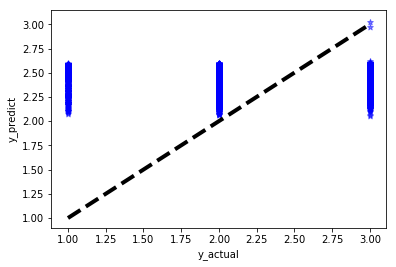

In [5]:
model_confirm1("pan13-author-profiling-training-corpus-2013-01-09/social_pos_matrix.csv")

   (  EX  CD  FW  NNS  NNP  POS  WP  VBD  RB ...    12   13   14   15   16  \
0  1   1   1   1    1    1    1   1    1   1 ...   0.0  0.0  0.0  0.0  0.0   
1  1   1   1   1    1    1    1   1    1   1 ...   0.0  0.0  1.0  0.0  0.0   
2  1   1   1   1    1    1    1   1    1   1 ...   0.0  0.0  0.0  0.0  0.0   
3  1   1   1   1    1    1    1   1    1   1 ...   0.0  0.0  0.0  0.0  0.0   
4  0   1   1   1    1    1    1   1    1   1 ...   0.0  0.0  0.0  0.0  0.0   

    17   18   19   20   21  
0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  1.0  
4  0.0  0.0  0.0  0.0  1.0  

[5 rows x 66 columns]
LR.intercept:
 -1943032160159130.5
LR.coef:
 [ 3.49697828e+00 -2.24267953e+14 -5.22554594e+13 -3.21551749e+00
  1.49400185e+14 -7.62908398e+14 -2.02089569e+00  5.46017984e+14
  6.88282017e+13  1.47595439e+15 -3.30468750e+00 -3.28397324e+14
  4.61734006e+14  4.17976735e+14 -1.20241136e+14  6.08783591e+14
  2.31418710e+14 -2.29992748e

D:\anaconda\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


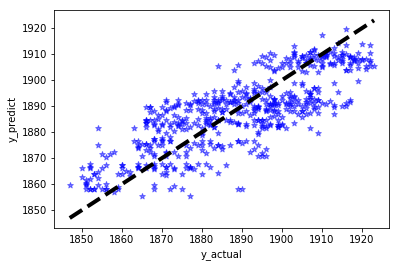

----------------------------------------------------I am a split line!!---------------------------------------
          (        EX        CD        FW       NNS       NNP       POS  \
0  0.151023  0.126838  0.126838  0.132226  0.126838  0.126838  0.143742   
1  0.141854  0.119138  0.119138  0.124199  0.119138  0.119138  0.135016   
2  0.138251  0.116111  0.116111  0.121044  0.116111  0.116111  0.131586   
3  0.128620  0.108023  0.108023  0.112612  0.108023  0.108023  0.122419   
4  0.000000  0.123996  0.123996  0.129264  0.123996  0.123996  0.140522   

         WP       VBD        RB    ...      12   13        14   15   16   17  \
0  0.126838  0.126838  0.126838    ...     0.0  0.0  0.000000  0.0  0.0  0.0   
1  0.119138  0.119138  0.119138    ...     0.0  0.0  0.557124  0.0  0.0  0.0   
2  0.116111  0.116111  0.116111    ...     0.0  0.0  0.000000  0.0  0.0  0.0   
3  0.108023  0.108023  0.108023    ...     0.0  0.0  0.000000  0.0  0.0  0.0   
4  0.123996  0.123996  0.123996    ...

D:\anaconda\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


MSE: 239.14680796982157
RMSE: 15.46437221389286
y_predict:
 [1889.36492918 1858.41552188 1922.16754131 1870.19570811 1860.62069418]
y_test:
 0    1882
1    1863
2    1910
3    1856
4    1864
Name: YEAR, dtype: int64


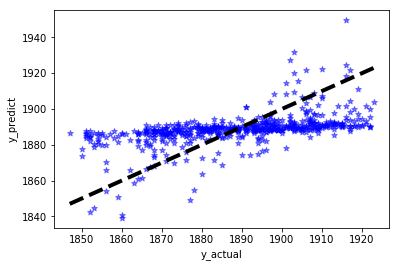

----------------------------------------------------I am a split line!!---------------------------------------


KeyError: "['Unnamed: 0.1'] not found in axis"

In [7]:
#比较 frequency vs tf-idf
model_confirm1("DCLSA/la_dataset_split/tem/all_pos_matrix.csv")
print("----------------------------------------------------I am a split line!!---------------------------------------")
model_confirm1("DCLSA/la_dataset_split/tem/ti_all_pos_matrix1.csv")
print("----------------------------------------------------I am a split line!!---------------------------------------")
model_confirm1("DCLSA/la_dataset_split/tem/ti_all_pos_matrix.csv")

          (        EX        CD        FW       NNS       NNP       POS  \
0  0.169477  0.142337  0.142337  0.148384  0.142337  0.142337  0.161307   
1  0.172619  0.144976  0.144976  0.151135  0.144976  0.144976  0.164297   
2  0.172619  0.144976  0.144976  0.151135  0.144976  0.144976  0.164297   
3  0.147629  0.123988  0.123988  0.129255  0.123988  0.123988  0.140512   
4  0.000000  0.163646  0.163646  0.170597  0.163646  0.163646  0.185455   

         WP       VBD        RB ...    12   13   14   15   16   17   18   19  \
0  0.142337  0.142337  0.142337 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.144976  0.144976  0.144976 ...   0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
2  0.144976  0.144976  0.144976 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.123988  0.123988  0.123988 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.163646  0.163646  0.163646 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    20   21  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  1.0 

D:\anaconda\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


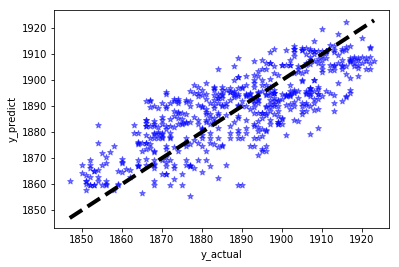

In [11]:
model_confirm1("DCLSA/la_dataset_split/tem/ti_all_pos_matrix.csv")

   clown  bequeath  juturna  'surpassing  overclean  novo  1st.  \
0      0         0        0            0          0     0     0   
1      0         1        0            0          0     0     0   
2      1         0        0            0          0     0     0   
3      1         0        0            0          0     0     0   
4      0         0        0            0          0     0     0   

   side-flirtation  saxons  cigar-smoking  ...   12.1  13.1  14.1  15.1  16.1  \
0                0       0              0  ...    0.0   0.0   0.0   0.0   0.0   
1                0       0              0  ...    0.0   0.0   1.0   0.0   0.0   
2                0       0              0  ...    0.0   0.0   0.0   0.0   0.0   
3                0       0              0  ...    0.0   0.0   0.0   0.0   0.0   
4                0       0              0  ...    0.0   0.0   0.0   0.0   0.0   

   17.1  18.1  19.1  20.1  21.1  
0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0  
2   0.0 

D:\anaconda\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


LR.intercept:
 1899.340871310363
LR.coef:
 [-0.00960562 -0.01120031 -0.00636333 ...  0.03108225 -0.00349108
 -0.04124101]
R^2:
 1.0
MSE: 2.3130524896084833e-23
RMSE: 4.809420432451797e-12
y_predict:
 [1882. 1863. 1910. 1856. 1864.]
y_test:
 0    1882
1    1863
2    1910
3    1856
4    1864
Name: YEAR, dtype: int64


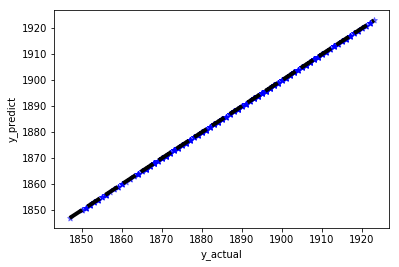

----------------------------------------------------I am a split line!!---------------------------------------
      clown  bequeath  juturna  'surpassing  overclean  novo  1st.  \
0  0.000000  0.000000      0.0          0.0        0.0   0.0   0.0   
1  0.000000  0.007076      0.0          0.0        0.0   0.0   0.0   
2  0.009441  0.000000      0.0          0.0        0.0   0.0   0.0   
3  0.017387  0.000000      0.0          0.0        0.0   0.0   0.0   
4  0.000000  0.000000      0.0          0.0        0.0   0.0   0.0   

   side-flirtation  saxons  cigar-smoking    ...     12.1  13.1      14.1  \
0              0.0     0.0            0.0    ...      0.0   0.0  0.000000   
1              0.0     0.0            0.0    ...      0.0   0.0  0.011753   
2              0.0     0.0            0.0    ...      0.0   0.0  0.000000   
3              0.0     0.0            0.0    ...      0.0   0.0  0.000000   
4              0.0     0.0            0.0    ...      0.0   0.0  0.000000   

   15

D:\anaconda\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


LR.intercept:
 1883.9004726886521
LR.coef:
 [-1.16823109  0.78740191 -1.82009444 ...  6.29594466 -0.02291272
 -6.08117231]
R^2:
 1.0
MSE: 1.5125360890565706e-23
RMSE: 3.889133694097659e-12
y_predict:
 [1882. 1863. 1910. 1856. 1864.]
y_test:
 0    1882
1    1863
2    1910
3    1856
4    1864
Name: YEAR, dtype: int64


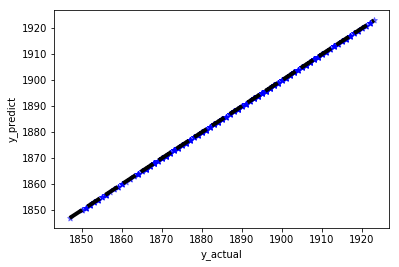

In [14]:
model_confirm1("DCLSA/la_dataset_split/tem/all_lemma_matrix.csv")
print("----------------------------------------------------I am a split line!!---------------------------------------")
model_confirm1("DCLSA/la_dataset_split/tem/ti_all_lemma_matrix1.csv")


   unhandicapped.VBD  threequarters.NNS  hay-riggings.NNS  instruct.VBD  \
0                  0                  0                 0             0   
1                  0                  0                 0             1   
2                  0                  0                 0             0   
3                  0                  0                 0             1   
4                  0                  0                 0             0   

   sealegs.JJ  parent-honoring.NN  Riparia.NNP  dntnken.NN  germain.NN  \
0           0                   0            0           0           0   
1           0                   0            0           0           0   
2           0                   0            0           0           0   
3           0                   0            0           0           0   
4           0                   0            0           0           0   

   Camp..NNP ...    12   13   14   15   16   17   18   19   20   21  
0          0 ...   0.0  0.0  0.0  

D:\anaconda\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


LR.intercept:
 1899.041137580946
LR.coef:
 [ 0.00368955 -0.01520564  0.00669715 ...  0.02945687 -0.00148773
 -0.03550384]
R^2:
 1.0
MSE: 1.834070708730008e-23
RMSE: 4.282605175275918e-12
y_predict:
 [1882. 1863. 1910. 1856. 1864.]
y_test:
 0    1882
1    1863
2    1910
3    1856
4    1864
Name: YEAR, dtype: int64


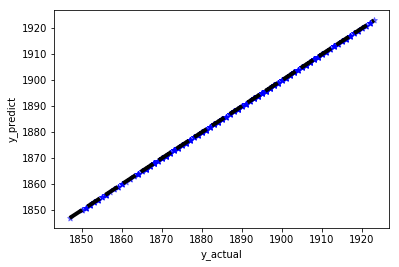

----------------------------------------------------I am a split line!!---------------------------------------


In [ ]:
model_confirm1("DCLSA/la_dataset_split/tem/all_lexical_matrix.csv")
print("----------------------------------------------------I am a split line!!---------------------------------------")
model_confirm1("DCLSA/la_dataset_split/tem/ti_all_lexical_matrix1.csv")

   (  EX  CD  FW  NNS  NNP  POS  WP  VBD  RB ...  JJS  ,  WP$  :  NNPS  SYM  \
0  1   1   1   1    1    1    1   1    1   1 ...    1  1    1  1     1    0   
1  1   1   1   1    1    1    1   1    1   1 ...    1  1    1  1     1    0   
2  1   1   1   1    1    1    1   1    1   1 ...    1  1    1  1     1    0   
3  1   1   1   1    1    1    1   1    1   1 ...    1  1    1  1     1    0   
4  1   1   1   1    1    1    1   1    1   1 ...    1  1    1  1     1    0   

   $  ``  PRP$  )  
0  0   1     1  1  
1  1   1     1  1  
2  0   1     1  1  
3  0   1     1  1  
4  0   1     1  1  

[5 rows x 44 columns]
LR.intercept:
 1910.857142857143
LR.coef:
 [-1.07142857e+00  0.00000000e+00  1.77635684e-15  0.00000000e+00
  8.88178420e-16 -8.88178420e-16 -5.38095238e+00  1.52229133e-19
  9.86076132e-32  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+

D:\anaconda\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


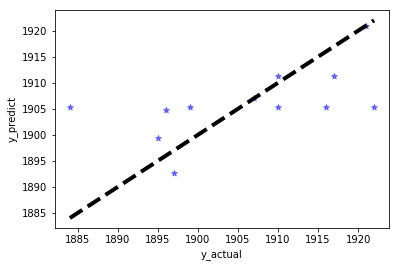

In [38]:
model_confirm1("DCLSA/la_dataset_split/ab_pos_matrix.csv")

   clown  bequeath  juturna  'surpassing  overclean  novo  1st.  \
0      0         0        0            0          0     0     0   
1      0         1        0            0          0     0     0   
2      1         0        0            0          0     0     0   
3      1         0        0            0          0     0     0   
4      0         0        0            0          0     0     0   

   side-flirtation  saxons  cigar-smoking  ...   12.1  13.1  14.1  15.1  16.1  \
0                0       0              0  ...    0.0   0.0   0.0   0.0   0.0   
1                0       0              0  ...    0.0   0.0   1.0   0.0   0.0   
2                0       0              0  ...    0.0   0.0   0.0   0.0   0.0   
3                0       0              0  ...    0.0   0.0   0.0   0.0   0.0   
4                0       0              0  ...    0.0   0.0   0.0   0.0   0.0   

   17.1  18.1  19.1  20.1  21.1  
0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0  
2   0.0 

D:\anaconda\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':


pca.components_ (142, 191828)
n_components:0.5,score:-64.73618041699038
pca.components_ (156, 191828)
n_components:0.525,score:-63.18757567103019
pca.components_ (169, 191828)
n_components:0.55,score:-62.854624680030966
pca.components_ (184, 191828)
n_components:0.575,score:-61.157051642797114
pca.components_ (199, 191828)
n_components:0.6,score:-60.2961367755027
pca.components_ (214, 191828)
n_components:0.625,score:-60.114543786626236
pca.components_ (230, 191828)
n_components:0.65,score:-60.224767729959616
pca.components_ (246, 191828)
n_components:0.675,score:-59.9110100486957
pca.components_ (263, 191828)
n_components:0.7,score:-61.0931503182742
pca.components_ (281, 191828)
n_components:0.725,score:-60.776137204329885
pca.components_ (299, 191828)
n_components:0.75,score:-61.15215605098367
pca.components_ (318, 191828)
n_components:0.775,score:-61.90179608900767
pca.components_ (337, 191828)
n_components:0.8,score:-62.27852701931876
pca.components_ (358, 191828)
n_components:0.82

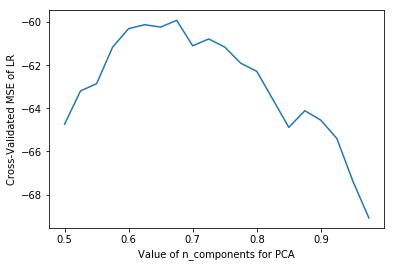

In [12]:
#pca参数选择
#参数选择版测试
def model_parameter(data):
    df= pd.read_csv(data)
    #df.drop(['Unnamed: 0'], axis=1,inplace=True)#通用版
    df.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1,inplace=True)#只有all_lemma_matrix是这个
    
    #X = df.iloc[:,0:-22]#不包含作者名
    X = df.iloc[:,0:-1]
    print(X.head())
    #X = df.iloc[:,0:-1]
    y = df.ix[:,-1]


#     print(X_train.shape[1])
#     print(reduced_X_train.shape[1])
    
    #显示主要因素的排名
#     n_pcs= pca.components_.shape[0]
#     most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
#     initial_feature_names = X_train.columns
#     most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
#     dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}
#     df = pd.DataFrame(sorted(dic.items()))
#     print(df)
    
    #再次分割数据集，不要随机分哟
#     train_x_reduced=多少行
#      test_x_reduced=多少行

#     #LR = LinearRegression()
#     LR = ElasticNet(random_state=0)
#     ### 对训练数据进行拟合训练
#     LR.fit(reduced_X, y)

    
    
    
    k_range = range(0,20)
    k_scores = []
    for k in k_range:
        pca = PCA(n_components=0.5+k*0.025)
        reduced_X = pca.fit_transform(X)
        pca.fit(X,y)
        ratio=pca.explained_variance_ratio_
        print("pca.components_",pca.components_.shape)
        #print("pca.components_",pca.components_)
        #print("pca_var_ratio",pca.explained_variance_ratio_.shape)
        #LR = LinearRegression()
        LR = ElasticNet(random_state=0)
        ### 对训练数据进行拟合训练
        LR.fit(reduced_X, y)
        n_mse = cross_val_score(LR, reduced_X, y, cv=10, scoring='neg_mean_squared_error')
        k_scores.append(n_mse.mean())
        print("n_components:"+str(0.5+k*0.025)+",score:"+str(n_mse.mean()))

    plt.plot([0.5+k*0.025 for k in list(k_range)], k_scores)
    plt.xlabel('Value of n_components for PCA')
    plt.ylabel('Cross-Validated MSE of LR')
    plt.show()

#     ### 输出参数,分别是截距（intercept_）和权重参数(coef_）
#     print('LR.intercept:\n',LR.intercept_)
#     print('LR.coef:\n',LR.coef_)
#     ### 计算确定系数R^2,取值范[0,1],值越大,说明模拟的拟合度越好，对模型的解释能力越强
#     print('R^2:\n',LR.score(reduced_X_test,y_test))
#     ### 根据测试数据计算预测值y_predict
#     y_predict=LR.predict(reduced_X_test)
#     ### MSE为均方误差，用测试数据来验证，MSE为预测数据和测试数据误差平方和的均值
#     print ("MSE:",metrics.mean_squared_error(y_test,y_predict))
#     ### RMSE为均方根误差
#     print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_predict)))


#     print('y_predict:\n',y_predict[0:5])    ### 输出预测值前5行
#     print('y_test:\n',y_test[0:5])          ### 输出测试值前5行
#     plt.scatter(y_test,y_predict,c='b',alpha=0.5,marker='*')   
#     plt.xlabel('y_test')
#     plt.ylabel('y_predict')
#     plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=4)   ### 画出y=x这条线
#     plt.show()
    


model_parameter("DCLSA/la_dataset_split/tem/all_lemma_matrix.csv")

      clown  bequeath  juturna  'surpassing  overclean  novo  1st.  \
0  0.000000  0.000000      0.0          0.0        0.0   0.0   0.0   
1  0.000000  0.007077      0.0          0.0        0.0   0.0   0.0   
2  0.009442  0.000000      0.0          0.0        0.0   0.0   0.0   
3  0.017393  0.000000      0.0          0.0        0.0   0.0   0.0   
4  0.000000  0.000000      0.0          0.0        0.0   0.0   0.0   

   side-flirtation  saxons  cigar-smoking  ...   12.1  13.1  14.1  15.1  16.1  \
0              0.0     0.0            0.0  ...    0.0   0.0   0.0   0.0   0.0   
1              0.0     0.0            0.0  ...    0.0   0.0   1.0   0.0   0.0   
2              0.0     0.0            0.0  ...    0.0   0.0   0.0   0.0   0.0   
3              0.0     0.0            0.0  ...    0.0   0.0   0.0   0.0   0.0   
4              0.0     0.0            0.0  ...    0.0   0.0   0.0   0.0   0.0   

   17.1  18.1  19.1  20.1  21.1  
0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.

D:\anaconda\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


pca.components_ (16, 191828)
n_components:0.5,score:-315.1880839588172
pca.components_ (18, 191828)
n_components:0.525,score:-315.1880839588172
pca.components_ (20, 191828)
n_components:0.55,score:-315.1880839588172
pca.components_ (23, 191828)
n_components:0.575,score:-315.1880839588172
pca.components_ (38, 191828)
n_components:0.6,score:-315.1880839588172
pca.components_ (60, 191828)
n_components:0.625,score:-315.1880839588172
pca.components_ (86, 191828)
n_components:0.65,score:-315.1880839588172
pca.components_ (114, 191828)
n_components:0.675,score:-315.1880839588172
pca.components_ (142, 191828)
n_components:0.7,score:-315.1880839588172
pca.components_ (171, 191828)
n_components:0.725,score:-315.1880839588172
pca.components_ (201, 191828)
n_components:0.75,score:-315.1880839588172
pca.components_ (232, 191828)
n_components:0.775,score:-315.1880839588172
pca.components_ (264, 191828)
n_components:0.8,score:-315.1880839588172
pca.components_ (296, 191828)
n_components:0.825,score:-

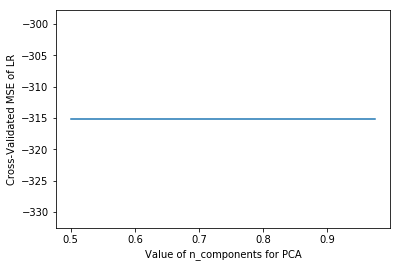

In [14]:
def model_parameter(data):
    df= pd.read_csv(data)
    df.drop(['Unnamed: 0'], axis=1,inplace=True)
    
    #X = df.iloc[:,0:-22]#不包含作者名
    X = df.iloc[:,0:-1]
    print(X.head())
    #X = df.iloc[:,0:-1]
    y = df.ix[:,-1]
    
    k_range = range(0,20)
    k_scores = []
    for k in k_range:
        pca = PCA(n_components=0.5+k*0.025)
        reduced_X = pca.fit_transform(X)
        pca.fit(X,y)
        ratio=pca.explained_variance_ratio_
        print("pca.components_",pca.components_.shape)
        #print("pca.components_",pca.components_)
        #print("pca_var_ratio",pca.explained_variance_ratio_.shape)
        #LR = LinearRegression()
        LR = ElasticNet(random_state=0)
        ### 对训练数据进行拟合训练
        LR.fit(reduced_X, y)
        n_mse = cross_val_score(LR, reduced_X, y, cv=10, scoring='neg_mean_squared_error')
        k_scores.append(n_mse.mean())
        print("n_components:"+str(0.5+k*0.025)+",score:"+str(n_mse.mean()))

    plt.plot([0.5+k*0.025 for k in list(k_range)], k_scores)
    plt.xlabel('Value of n_components for PCA')
    plt.ylabel('Cross-Validated MSE of LR')
    plt.show()
    
model_parameter("DCLSA/la_dataset_split/tem/ti_all_lemma_matrix.csv")

In [15]:
model_parameter("DCLSA/la_dataset_split/tem/ti_all_lexical_matrix.csv")

MemoryError: 

          (        EX        CD        FW       NNS       NNP       POS  \
0  0.169477  0.142337  0.142337  0.148384  0.142337  0.142337  0.161307   
1  0.172619  0.144976  0.144976  0.151135  0.144976  0.144976  0.164297   
2  0.172619  0.144976  0.144976  0.151135  0.144976  0.144976  0.164297   
3  0.147629  0.123988  0.123988  0.129255  0.123988  0.123988  0.140512   
4  0.000000  0.163646  0.163646  0.170597  0.163646  0.163646  0.185455   

         WP       VBD        RB ...    12   13   14   15   16   17   18   19  \
0  0.142337  0.142337  0.142337 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.144976  0.144976  0.144976 ...   0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
2  0.144976  0.144976  0.144976 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.123988  0.123988  0.123988 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.163646  0.163646  0.163646 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    20   21  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  1.0 

D:\anaconda\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


pca.components_ (18, 66)
n_components:0.825,score:-319.55961894975337
pca.components_ (19, 66)
n_components:0.8500000000000001,score:-319.55961894975337
pca.components_ (20, 66)
n_components:0.875,score:-319.55961894975337
pca.components_ (21, 66)
n_components:0.9,score:-319.55961894975337
pca.components_ (23, 66)
n_components:0.925,score:-319.55961894975337
pca.components_ (24, 66)
n_components:0.95,score:-319.55961894975337
pca.components_ (27, 66)
n_components:0.9750000000000001,score:-319.55961894975337


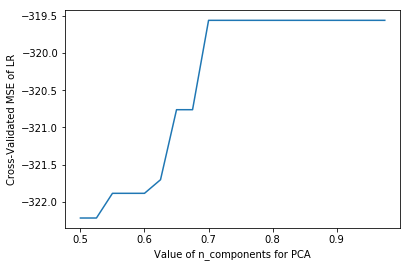

In [3]:
#pca参数选择
#参数选择版测试
# def model_parameter2(data):
#     df= pd.read_csv(data)
#     df.drop(['Unnamed: 0.1'], axis=1,inplace=True)
    
#     #X = df.iloc[:,0:-22]#不包含作者名
#     X = df.iloc[:,0:-1]
#     print(X.head())
#     y = df.ix[:,-1]


# #     print(X_train.shape[1])
# #     print(reduced_X_train.shape[1])
    
#     #显示主要因素的排名
# #     n_pcs= pca.components_.shape[0]
# #     most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
# #     initial_feature_names = X_train.columns
# #     most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
# #     dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}
# #     df = pd.DataFrame(sorted(dic.items()))
# #     print(df)
    
#     #再次分割数据集，不要随机分哟
# #     train_x_reduced=多少行
# #      test_x_reduced=多少行

# #     #LR = LinearRegression()
# #     LR = ElasticNet(random_state=0)
# #     ### 对训练数据进行拟合训练
# #     LR.fit(reduced_X, y)

    
    
    
#     k_range = range(0,20)
#     k_scores = []
#     for k in k_range:
#         pca = PCA(n_components=0.5+k*0.025)
#         reduced_X = pca.fit_transform(X)
#         pca.fit(X,y)
#         ratio=pca.explained_variance_ratio_
#         print("pca.components_",pca.components_.shape)
#         #print("pca.components_",pca.components_)
#         #print("pca_var_ratio",pca.explained_variance_ratio_.shape)
#         #LR = LinearRegression()
#         LR = ElasticNet(random_state=0)
#         ### 对训练数据进行拟合训练
#         LR.fit(reduced_X, y)
#         n_mse = cross_val_score(LR, reduced_X, y, cv=10, scoring='neg_mean_squared_error')
#         k_scores.append(n_mse.mean())
#         print("n_components:"+str(0.5+k*0.025)+",score:"+str(n_mse.mean()))

#     plt.plot([0.5+k*0.025 for k in list(k_range)], k_scores)
#     plt.xlabel('Value of n_components for PCA')
#     plt.ylabel('Cross-Validated MSE of LR')
#     plt.show()
    

# #     ### 输出参数,分别是截距（intercept_）和权重参数(coef_）
# #     print('LR.intercept:\n',LR.intercept_)
# #     print('LR.coef:\n',LR.coef_)
# #     ### 计算确定系数R^2,取值范[0,1],值越大,说明模拟的拟合度越好，对模型的解释能力越强
# #     print('R^2:\n',LR.score(reduced_X_test,y_test))
# #     ### 根据测试数据计算预测值y_predict
# #     y_predict=LR.predict(reduced_X_test)
# #     ### MSE为均方误差，用测试数据来验证，MSE为预测数据和测试数据误差平方和的均值
# #     print ("MSE:",metrics.mean_squared_error(y_test,y_predict))
# #     ### RMSE为均方根误差
# #     print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_predict)))


# #     print('y_predict:\n',y_predict[0:5])    ### 输出预测值前5行
# #     print('y_test:\n',y_test[0:5])          ### 输出测试值前5行
# #     plt.scatter(y_test,y_predict,c='b',alpha=0.5,marker='*')   
# #     plt.xlabel('y_test')
# #     plt.ylabel('y_predict')
# #     plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=4)   ### 画出y=x这条线
# #     plt.show()
    


model_parameter("DCLSA/la_dataset_split/tem/ti_all_pos_matrix.csv")

   Unnamed: 0.1  (  EX  CD  FW  NNS  NNP  POS  WP  VBD ...    12   13   14  \
0             0  1   1   1   1    1    1    1   1    1 ...   0.0  0.0  0.0   
1             1  1   1   1   1    1    1    1   1    1 ...   0.0  0.0  1.0   
2             2  1   1   1   1    1    1    1   1    1 ...   0.0  0.0  0.0   
3             3  1   1   1   1    1    1    1   1    1 ...   0.0  0.0  0.0   
4             4  0   1   1   1    1    1    1   1    1 ...   0.0  0.0  0.0   

    15   16   17   18   19   20   21  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  1.0  

[5 rows x 67 columns]


D:\anaconda\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


pca.components_ (1, 67)
k:0,score:-335.288515745755
pca.components_ (1, 67)
k:1,score:-335.288515745755
pca.components_ (1, 67)
k:2,score:-335.288515745755
pca.components_ (1, 67)
k:3,score:-335.288515745755
pca.components_ (1, 67)
k:4,score:-335.288515745755
pca.components_ (1, 67)
k:5,score:-335.288515745755
pca.components_ (1, 67)
k:6,score:-335.288515745755
pca.components_ (1, 67)
k:7,score:-335.288515745755
pca.components_ (1, 67)
k:8,score:-335.288515745755
pca.components_ (1, 67)
k:9,score:-335.288515745755
pca.components_ (1, 67)
k:10,score:-335.288515745755
pca.components_ (1, 67)
k:11,score:-335.288515745755
pca.components_ (1, 67)
k:12,score:-335.288515745755
pca.components_ (1, 67)
k:13,score:-335.288515745755
pca.components_ (1, 67)
k:14,score:-335.288515745755
pca.components_ (1, 67)
k:15,score:-335.288515745755
pca.components_ (1, 67)
k:16,score:-335.288515745755
pca.components_ (1, 67)
k:17,score:-335.288515745755
pca.components_ (1, 67)
k:18,score:-335.288515745755
pca

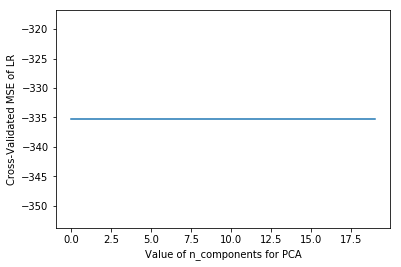

In [40]:
model_parameter("DCLSA/la_dataset_split/tem/all_lexical_matrix.csv")

In [ ]:
import pandas as pd
d =  pd.read_csv('DCLSA/la_dataset_split/tem/ti_all_lexical_matrix.csv')

In [ ]:
#baseline模型

In [ ]:
#正则化模型

In [ ]:
author 的extra 变体版